<img height="100" src="https://i.postimg.cc/gjptBxF4/logo-gas-removebg-preview.png" width="250"/>

In [1]:
import os
import pandas as pd

path = os.path.join(os.getcwd(), 'data', "data_article.xlsx")
df = pd.read_excel(path,"Dados_finais")

# Filtering the DataFrame to keep only the first occurrence of each 'Cultivar' and 'Estadio'
df1 = df.loc[:, ['Cultivar',"Rep" ,'Estadio', 'SDG']]

# Calculating the mean of 'SDG' for each combination of 'Cultivar' and 'Estadio'
df1 = df1.groupby(['Cultivar', 'Estadio']).agg({'SDG': 'mean'}).reset_index()

# Filtering data by R8 "Estadio"
R8 = df1.loc[df1['Estadio'] == 'R8', :]

# Dropping the 'Estadio' column
R8 = R8.drop(columns=['Estadio'])

# Setting 'Cultivar' as the index
R8.set_index(['Cultivar'], inplace=True)

# Saving index values
index_values = R8.index.values

In [2]:
from pingouin import normality

# Checking the normality of the data
normality(data=R8,
          method='shapiro',
          alpha=.01)

,W,pval,normal
SDG,0.966638,0.63347,True


In [3]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
R8 = StandardScaler().fit_transform(R8)

# Converting the standardized data back to a DataFrame
R8 = pd.DataFrame(R8, columns=['SDG'], index=index_values)

In [4]:
from scipy.cluster.hierarchy import linkage

# Performing hierarchical clustering using Ward's method
Z = linkage(R8, method='ward', metric='euclidean')

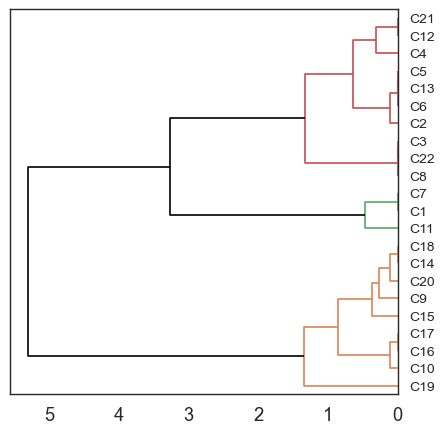

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns

# Plotting the dendrogram
sns.set_theme(style='white', context="paper", font_scale=1.5)

plt.figure(figsize=(5, 5))
dendrogram(Z,
           leaf_rotation=0,
           leaf_font_size=10,
           orientation='left',
           labels=R8.index,

           color_threshold=0.5*max(Z[:,2]),
           above_threshold_color='black',
           )

fig_path = os.path.join(os.getcwd(), 'images', "Figure 2.jpg")
#plt.savefig(fig_path, dpi=600)

plt.show()

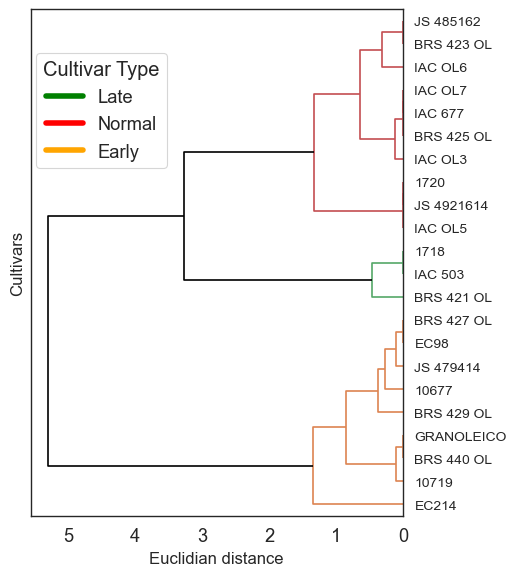

In [6]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns

# Configurações do tema
sns.set_theme(style='white', context="paper", font_scale=1.5)

# Definir cores para cada tipo de cultivar
color_dict = {'Late': 'green', 'Normal': 'red', 'Early': 'orange'}

# Criar figura
plt.figure(figsize=(6, 6))

cultivar_mapping = {
    'C19': 'EC214',
    'C15': 'BRS 429 OL',
    'C20': 'JS 479414',
    'C14': 'EC98',
    'C18': 'BRS 427 OL',
    'C9': '10677',
    'C16': 'BRS 440 OL',
    'C17': 'GRANOLEICO',
    'C10': '10719',
    'C13': 'IAC 677',
    'C5': 'IAC OL7',
    'C6': 'BRS 425 OL',
    'C2': 'IAC OL3',
    'C12': 'BRS 423 OL',
    'C21': 'JS 485162',
    'C4': 'IAC OL6',
    'C22': 'JS 4921614',
    'C3': '1720',
    'C8': 'IAC OL5',
    'C1': 'IAC 503',
    'C7': '1718',
    'C11': 'BRS 421 OL'
}


# Plotar o dendrograma usando os nomes mapeados das cultivares
dendrogram(Z,
           leaf_rotation=0,
           leaf_font_size=10,
           orientation='left',
           labels=[cultivar_mapping[cultivar] for cultivar in R8.index],
           color_threshold=0.5 * max(Z[:, 2]),
           above_threshold_color='black')

# Adicionar linhas da legenda manualmente
legend_elements = [Line2D([0], [0], color=color, lw=4, label=label)
                   for label, color in color_dict.items()]

# Adicionar a legenda
plt.legend(handles=legend_elements,
           title='Cultivar Type',
           loc='center left',
           bbox_to_anchor=(-.01, .8))

# Ajustes no layout
plt.xlabel('Euclidian distance', fontsize=12)
plt.ylabel('Cultivars', fontsize=12)

# Ajustar margens
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Salvar a figura  
#fig_path = os.path.join(os.getcwd(), 'images', "Figure 2.jpg")
plt.savefig(fig_path, dpi=600)

plt.show()

In [7]:
from scipy.cluster.hierarchy import fcluster

# Retrieving the main clusters cultivars
clusters = fcluster(Z, t=0.5 * max(Z[:, 2]), criterion='distance')

# Creating a DataFrame with the clusters using mapped cultivar names
clusters_df = pd.DataFrame({'Cultivar': [cultivar_mapping[c] for c in R8.index], 'Cluster': clusters})
clusters_df = clusters_df.groupby('Cluster')['Cultivar'].apply(list).reset_index()
clusters_df.columns = ['Cluster', 'Cultivar']
clusters_df['Cultivar'] = clusters_df['Cultivar'].apply(lambda x: ', '.join(x))
clusters_df = clusters_df.sort_values(by='Cluster').reset_index(drop=True)
clusters_df

,Cluster,Cultivar
0,1,"10719, EC98, BRS 429 OL, BRS 440 OL, GRANOLEIC..."
1,2,"IAC 503, BRS 421 OL, 1718"
2,3,"BRS 423 OL, IAC 677, IAC OL3, JS 485162, JS 49..."
